# Conjecture

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import SpectrumDistance
from optimization import ModelQuantumMap, Logger
from quantum_channel import ReplacementChannel, channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader
from experimental import generate_pauli_circuits
from lindblad_channels import CompactLindbladMap

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


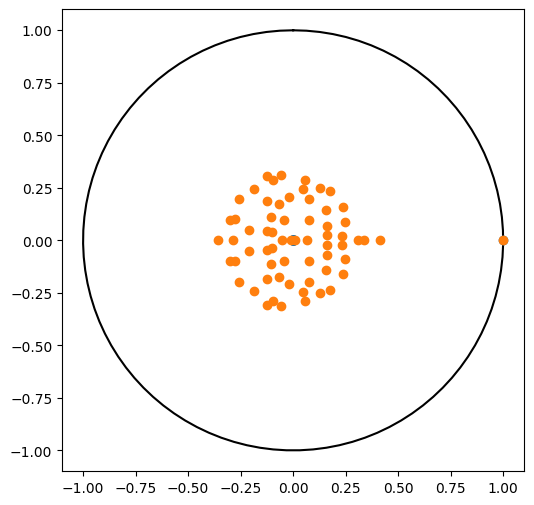

In [66]:
n = 3
d = 2**n
np.random.seed(42)
tf.random.set_seed(42)


channel_target = KrausMap(d=d,
                          rank = d)
spectrum_target = channel_spectrum(channel_target)

channel_model = CompactLindbladMap(d=d, 
                                   rank=d**2,
                                   alpha = 0.0,
                                   beta = 0.01,)
spectrum_model = channel_spectrum(channel_model)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")


model = ModelQuantumMap(channel = channel_model,
                        loss_function = SpectrumDistance(sigma=0.1, k=10000),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = SpectrumDistance(sigma=1, k=10000), 
                                        N=0,
                                        sample_freq=1000)
                        )

In [62]:
model.train(inputs = [spectrum_target],
            targets = None,
            num_iter = 10000,
            N = 0,
            )

  0%|          | 0/10000 [00:00<?, ?it/s]

-0.5755349335308675 None
-0.5796957350749036 None
-0.6155281407629105 None
-0.6155864559898168 None
-0.6153251470285558 None
-0.6147978263782072 None
-0.6154277675942431 None
-0.6153444614406041 None
-0.6155256149592823 None
-0.6154591575609514 None
-0.6158735263706003 None


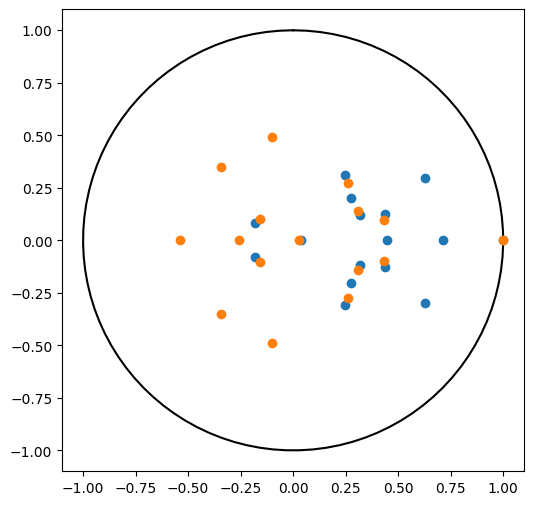

In [63]:
spectrum_target = channel_spectrum(channel_target)
spectrum_model = channel_spectrum(channel_model)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")

In [67]:
prod = 1

magnitude = np.abs(spectrum_model[:,0] + 1j*spectrum_model[:,1])
eig_min = np.min(magnitude)
print(eig_min**d)
print("-----")

for eig in spectrum_model:
    print(np.abs(eig))
    prod *= eig

print(prod)

4.0892601742717906e-45
-----
[2.8278e-06 1.8362e-18]
[3.9458e-06 1.2691e-06]
[3.9458e-06 1.2691e-06]
[5.4191e-06 4.4763e-18]
[6.3713e-06 3.1549e-06]
[6.3713e-06 3.1549e-06]
[4.8079e-06 6.3214e-06]
[4.8079e-06 6.3214e-06]
[7.9291e-06 1.0075e-06]
[7.9291e-06 1.0075e-06]
[8.3085e-06 4.2534e-06]
[8.3085e-06 4.2534e-06]
[9.4772e-06 4.0768e-07]
[9.4772e-06 4.0768e-07]
[8.4308e-06 9.3955e-06]
[8.4308e-06 9.3955e-06]
[1.3541e-05 3.7099e-06]
[1.3541e-05 3.7099e-06]
[1.1494e-05 9.7993e-06]
[1.1494e-05 9.7993e-06]
[1.3545e-05 8.5380e-06]
[1.3545e-05 8.5380e-06]
[1.7792e-05 6.3723e-06]
[1.7792e-05 6.3723e-06]
[1.7023e-05 9.6496e-06]
[1.7023e-05 9.6496e-06]
[2.2003e-05 5.3892e-18]
[1.9677e-05 1.5398e-05]
[1.9677e-05 1.5398e-05]
[2.7679e-05 8.2155e-06]
[2.7679e-05 8.2155e-06]
[2.6770e-05 2.2977e-05]
[2.6770e-05 2.2977e-05]
[3.6483e-05 1.2657e-05]
[3.6483e-05 1.2657e-05]
[3.2026e-05 2.5507e-05]
[3.2026e-05 2.5507e-05]
[4.3442e-05 7.6149e-18]
[4.5502e-05 1.5649e-05]
[4.5502e-05 1.5649e-05]
[3.4678e-05

In [69]:
prod = 1

magnitude = np.abs(spectrum_target[:,0] + 1j*spectrum_target[:,1])
eig_min = np.min(magnitude)
print(eig_min**d)
print("-----")

for eig in spectrum_model:
    #print(np.abs(eig))
    prod *= eig

print(prod)

1.0721679504701232e-16
-----
tf.Tensor([ 6.1897e-288+0.j -0.0000e+000+0.j], shape=(2,), dtype=complex128)
